## gerekli kütüphanelerin eklenmesi

In [1]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.utils import resample

## veri setininin okunması

In [2]:
df=pd.read_csv('BankCustomerData.csv')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,term_deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42634,21,student,single,secondary,no,2488,no,no,telephone,12,jan,661,2,92,1,success,yes
42635,87,retired,married,primary,no,2190,no,no,telephone,12,jan,512,2,-1,0,unknown,yes
42636,34,blue-collar,married,primary,no,6718,no,no,cellular,13,jan,278,4,97,1,other,no
42637,22,student,single,secondary,no,254,no,no,cellular,13,jan,143,2,-1,0,unknown,yes


In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,term_deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,term_deposit
42634,21,student,single,secondary,no,2488,no,no,telephone,12,jan,661,2,92,1,success,yes
42635,87,retired,married,primary,no,2190,no,no,telephone,12,jan,512,2,-1,0,unknown,yes
42636,34,blue-collar,married,primary,no,6718,no,no,cellular,13,jan,278,4,97,1,other,no
42637,22,student,single,secondary,no,254,no,no,cellular,13,jan,143,2,-1,0,unknown,yes
42638,32,management,single,tertiary,no,1962,no,no,cellular,13,jan,130,1,-1,0,unknown,no


In [5]:
df.shape

(42639, 17)

In [6]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,42639.000000,42639.000000,42639.000000,42639.000000,42639.000000,42639.000000,42639.000000
mean,40.788808,1331.863951,15.854781,255.957504,2.816412,34.169141,0.465442
std,10.200236,3011.537676,8.293901,258.361368,3.163564,92.041713,2.166705
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,62.000000,8.000000,101.000000,1.000000,-1.000000,0.000000
50%,39.000000,429.000000,16.000000,177.000000,2.000000,-1.000000,0.000000
75%,48.000000,1381.500000,21.000000,315.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,536.000000,275.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42639 entries, 0 to 42638
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           42639 non-null  int64 
 1   job           42639 non-null  object
 2   marital       42639 non-null  object
 3   education     42639 non-null  object
 4   default       42639 non-null  object
 5   balance       42639 non-null  int64 
 6   housing       42639 non-null  object
 7   loan          42639 non-null  object
 8   contact       42639 non-null  object
 9   day           42639 non-null  int64 
 10  month         42639 non-null  object
 11  duration      42639 non-null  int64 
 12  campaign      42639 non-null  int64 
 13  pdays         42639 non-null  int64 
 14  previous      42639 non-null  int64 
 15  poutcome      42639 non-null  object
 16  term_deposit  42639 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.5+ MB


In [8]:
#nümerik veriler
sürekli=df.describe().columns
print(sürekli)

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')


Sürekli Değişkenler 



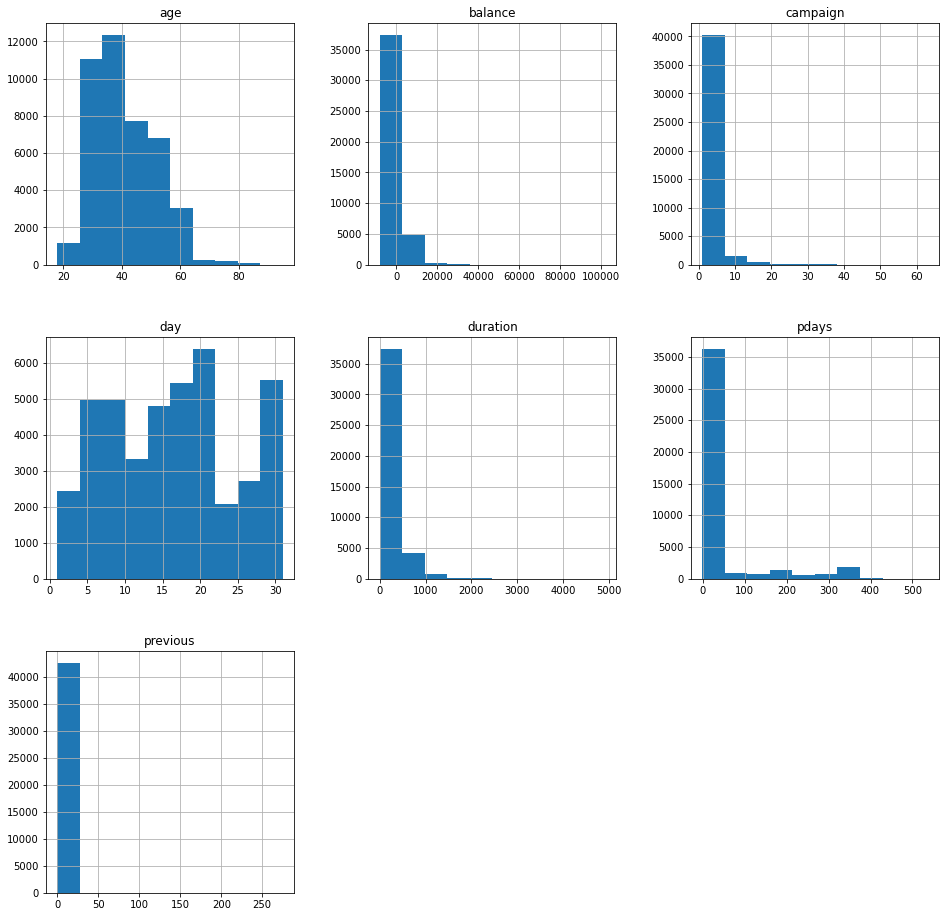

In [9]:
print("Sürekli Değişkenler","\n")
df.hist(column=sürekli,figsize=(16,16))
plt.show()

In [10]:
#kategorik veriler
kategorik=df.describe(include=[object]).columns
print(kategorik)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'term_deposit'],
      dtype='object')


Kategorik Değişkenler 



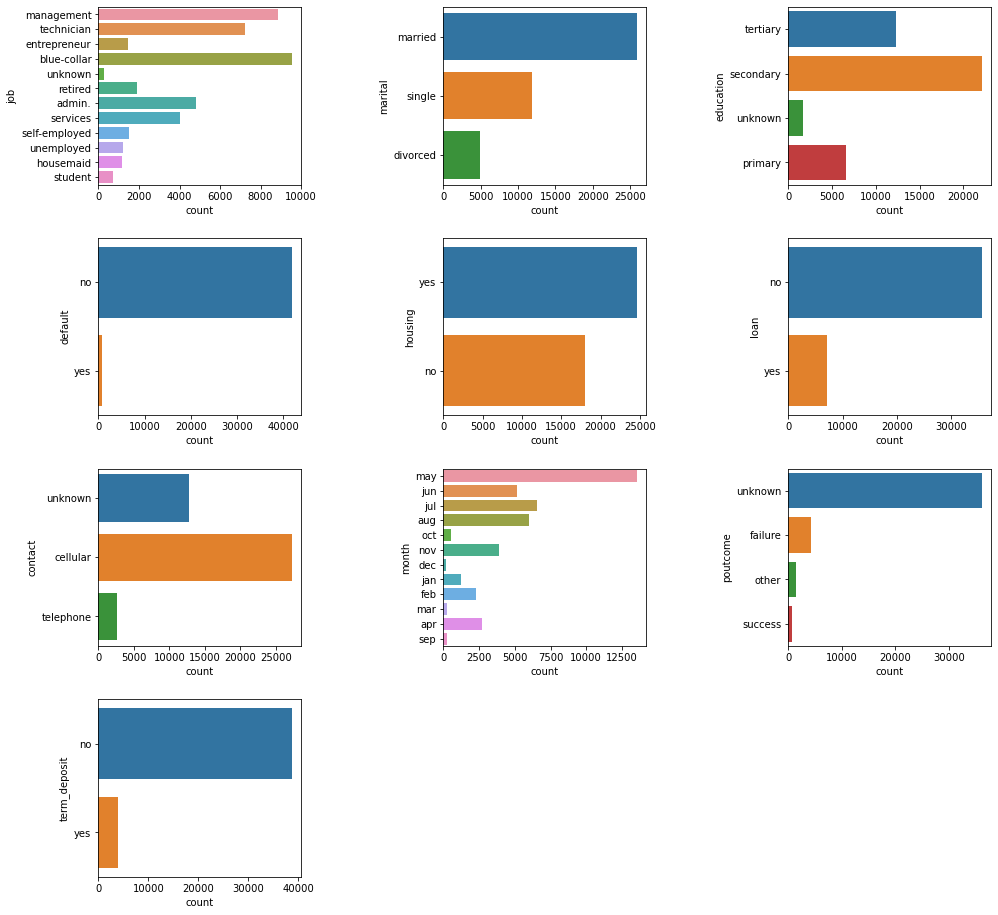

In [11]:
print("Kategorik Değişkenler","\n")
fig, axes = plt.subplots(4, 3, figsize=(16, 16))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.7, hspace=0.3)
for i, ax in enumerate(axes.ravel()):
    if i > 9:
        ax.set_visible(False)
        continue
    sns.countplot(y = kategorik[i], data=df, ax=ax)
        
plt.show()

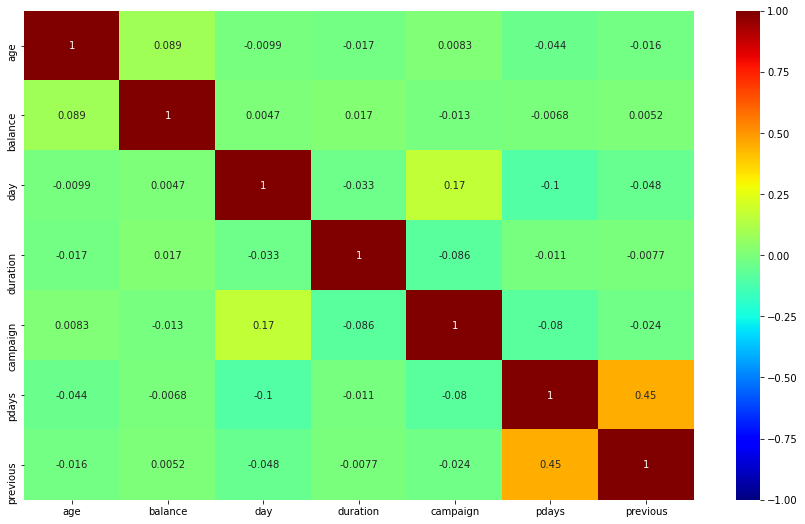

In [12]:
plt.figure(figsize=(15,9))
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1,cmap="jet")

## keşifsel veri analizi

In [13]:
df.isnull().sum() #eksik verinin olup olmadığı kontrol ediliyor.

age             0
job             0
marital         0
education       0
default         0
balance         0
housing         0
loan            0
contact         0
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome        0
term_deposit    0
dtype: int64

In [14]:
df.eq(0).sum() #sıfır değerlerinin sayısı 

age                 0
job                 0
marital             0
education           0
default             0
balance          3382
housing             0
loan                0
contact             0
day                 0
month               0
duration            3
campaign            0
pdays               0
previous        36082
poutcome            0
term_deposit        0
dtype: int64

In [15]:
df.eq("unknown").sum() #unknown(bilinmyen) değerlerinin sayısı

age                 0
job               264
marital             0
education        1690
default             0
balance             0
housing             0
loan                0
contact         12776
day                 0
month               0
duration            0
campaign            0
pdays               0
previous            0
poutcome        36085
term_deposit        0
dtype: int64

In [16]:
df.drop(["previous","poutcome","contact"], axis=1, inplace=True) #bilinmeyen sayıları çok yüksek olduğu için bu sütunlar silindi


In [17]:
df[["job","education"]]=df[["job","education"]].replace("unknown",np.NaN)#bilinmeyen değerler NaN olarak değiştirildi.
df

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,term_deposit
0,58,management,married,tertiary,no,2143,yes,no,5,may,261,1,-1,no
1,44,technician,single,secondary,no,29,yes,no,5,may,151,1,-1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,76,1,-1,no
3,47,blue-collar,married,NaN,no,1506,yes,no,5,may,92,1,-1,no
4,33,NaN,single,NaN,no,1,no,no,5,may,198,1,-1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42634,21,student,single,secondary,no,2488,no,no,12,jan,661,2,92,yes
42635,87,retired,married,primary,no,2190,no,no,12,jan,512,2,-1,yes
42636,34,blue-collar,married,primary,no,6718,no,no,13,jan,278,4,97,no
42637,22,student,single,secondary,no,254,no,no,13,jan,143,2,-1,yes


In [18]:
df.dropna(how='any',inplace=True) #Nan Değerler silindi.

In [19]:
df.housing.value_counts()


yes    23767
no     17035
Name: housing, dtype: int64

In [20]:
def replace_val(val):
    if val=="no":
        return 0
    else:
        return 1
df["housing"]=df["housing"].apply(replace_val,1)

In [21]:
df.default.value_counts()

no     40024
yes      778
Name: default, dtype: int64

In [22]:
df["default"]=df["default"].apply(replace_val,1)

In [23]:
df.loan.value_counts()

no     33851
yes     6951
Name: loan, dtype: int64

In [24]:
df["loan"]=df["loan"].apply(replace_val,1)

In [25]:
df.term_deposit.value_counts()

no     37012
yes     3790
Name: term_deposit, dtype: int64

In [26]:
df["term_deposit"]=df["term_deposit"].apply(replace_val,1)

In [27]:
df.job.value_counts()

blue-collar      9091
management       8641
technician       6995
admin.           4655
services         3891
retired          1785
self-employed    1465
entrepreneur     1377
unemployed       1166
housemaid        1134
student           602
Name: job, dtype: int64

In [28]:
df["job"]=df["job"].map({
    "blue-collar":0,
    "management": 1,
    "technician":2,
    "admin.":3,
    "services":4,
    "retired":5,
    "self-employed":6,
    "entrepreneur":7,
    "unemployed":8,
    "housemaid":9,
    "student":10,
    
}.get)
#map yöntemi kullanarak object tiplerini integer'a çevirdim.

In [29]:
df.marital.value_counts()

married     24690
single      11313
divorced     4799
Name: marital, dtype: int64

In [30]:
df["marital"]=df["marital"].replace({
    "married":0,
    "single": 1,
    "divorced":2
})
#replace yöntemi kullanarak object tiplerini integer'a çevirdim.

In [31]:
df.education.value_counts()

secondary    22001
tertiary     12269
primary       6532
Name: education, dtype: int64

In [32]:
df["education"]=df["education"].replace({
    "secondary":0,
    "tertiary": 1,
    "primary":2,
    
})

In [33]:
df.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,term_deposit
0,58,1,0,1,0,2143,1,0,5,may,261,1,-1,0
1,44,2,1,0,0,29,1,0,5,may,151,1,-1,0
2,33,7,0,0,0,2,1,1,5,may,76,1,-1,0
5,35,1,0,1,0,231,1,0,5,may,139,1,-1,0
6,28,1,1,1,0,447,1,1,5,may,217,1,-1,0


In [34]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,term_deposit
42634,21,10,1,0,0,2488,0,0,12,jan,661,2,92,1
42635,87,5,0,2,0,2190,0,0,12,jan,512,2,-1,1
42636,34,0,0,2,0,6718,0,0,13,jan,278,4,97,0
42637,22,10,1,0,0,254,0,0,13,jan,143,2,-1,1
42638,32,1,1,1,0,1962,0,0,13,jan,130,1,-1,0


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40802 entries, 0 to 42638
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           40802 non-null  int64 
 1   job           40802 non-null  int64 
 2   marital       40802 non-null  int64 
 3   education     40802 non-null  int64 
 4   default       40802 non-null  int64 
 5   balance       40802 non-null  int64 
 6   housing       40802 non-null  int64 
 7   loan          40802 non-null  int64 
 8   day           40802 non-null  int64 
 9   month         40802 non-null  object
 10  duration      40802 non-null  int64 
 11  campaign      40802 non-null  int64 
 12  pdays         40802 non-null  int64 
 13  term_deposit  40802 non-null  int64 
dtypes: int64(13), object(1)
memory usage: 4.7+ MB


In [36]:
df["job"]

0         1
1         2
2         7
5         1
6         1
         ..
42634    10
42635     5
42636     0
42637    10
42638     1
Name: job, Length: 40802, dtype: int64

In [37]:
df.drop(["day","month"], axis=1, inplace=True)

In [38]:
#normalizasyon
df["balance"].min()

-8019

In [39]:
df["balance"].max()

102127

In [40]:
df["balance"]=df["balance"].apply(lambda v: (v - df["balance"].min())/ (df["balance"].max()-df["balance"].min()))

In [41]:
df["balance"].head()

0    0.092259
1    0.073067
2    0.072822
5    0.074901
6    0.076862
Name: balance, dtype: float64

In [42]:
df.duration=df.duration.apply(lambda v: ((v - df.duration.min())/(df.duration.max()-df.duration.min())))

In [43]:
df.head()

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,term_deposit
0,58,1,0,1,0,0.092259,1,0,0.053070,1,-1,0
1,44,2,1,0,0,0.073067,1,0,0.030704,1,-1,0
2,33,7,0,0,0,0.072822,1,1,0.015453,1,-1,0
5,35,1,0,1,0,0.074901,1,0,0.028264,1,-1,0
6,28,1,1,1,0,0.076862,1,1,0.044124,1,-1,0


In [44]:
df.shape

(40802, 12)

In [45]:
df.describe()

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,term_deposit
count,40802.000000,40802.000000,40802.000000,40802.000000,40802.000000,40802.000000,40802.000000,40802.000000,40802.000000,40802.000000,40802.000000,40802.000000
mean,40.619700,2.575070,0.512499,0.620876,0.019068,0.084816,0.582496,0.170359,0.052083,2.809078,34.528087,0.092888
std,10.115579,2.532747,0.696483,0.745374,0.136765,0.027268,0.493154,0.375953,0.052637,3.126425,92.485485,0.290278
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,1.000000,0.000000,0.000000,0.000000,0.073357,0.000000,0.000000,0.020537,1.000000,-1.000000,0.000000
50%,39.000000,2.000000,0.000000,0.000000,0.000000,0.076653,1.000000,0.000000,0.035990,2.000000,-1.000000,0.000000
75%,48.000000,4.000000,1.000000,1.000000,0.000000,0.085269,1.000000,0.000000,0.063847,3.000000,-1.000000,0.000000
max,95.000000,10.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,58.000000,536.000000,1.000000


In [46]:
cr=df.corr()
#özelliklerin birbirleriyle olan ilişkisi
cr

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,term_deposit
age,1.000000,0.075664,-0.115157,0.154739,-0.014512,0.088034,-0.185207,-0.004715,-0.016713,0.007841,-0.042776,0.009393
job,0.075664,1.000000,0.046680,-0.063956,0.002448,0.012480,-0.138941,-0.018103,0.002600,-0.025378,-0.037246,0.037353
marital,-0.115157,0.046680,1.000000,-0.069738,0.018597,-0.028516,-0.008247,-0.017352,0.019434,-0.028349,0.016957,0.045537
education,0.154739,-0.063956,-0.069738,1.000000,-0.008425,0.037924,-0.060100,-0.049041,-0.003820,0.018706,-0.025203,0.006330
default,-0.014512,0.002448,0.018597,-0.008425,1.000000,-0.067795,-0.014602,0.075057,-0.009792,0.014762,-0.025137,-0.015599
balance,0.088034,0.012480,-0.028516,0.037924,-0.067795,1.000000,-0.060737,-0.082624,0.015081,-0.015010,-0.006369,0.044733
housing,-0.185207,-0.138941,-0.008247,-0.060100,-0.014602,-0.060737,1.000000,0.021160,0.014016,-0.038316,0.177075,-0.100272
loan,-0.004715,-0.018103,-0.017352,-0.049041,0.075057,-0.082624,0.021160,1.000000,-0.007317,0.006716,-0.012278,-0.051579
duration,-0.016713,0.002600,0.019434,-0.003820,-0.009792,0.015081,0.014016,-0.007317,1.000000,-0.084261,-0.010970,0.419340
campaign,0.007841,-0.025378,-0.028349,0.018706,0.014762,-0.015010,-0.038316,0.006716,-0.084261,1.000000,-0.080552,-0.057778


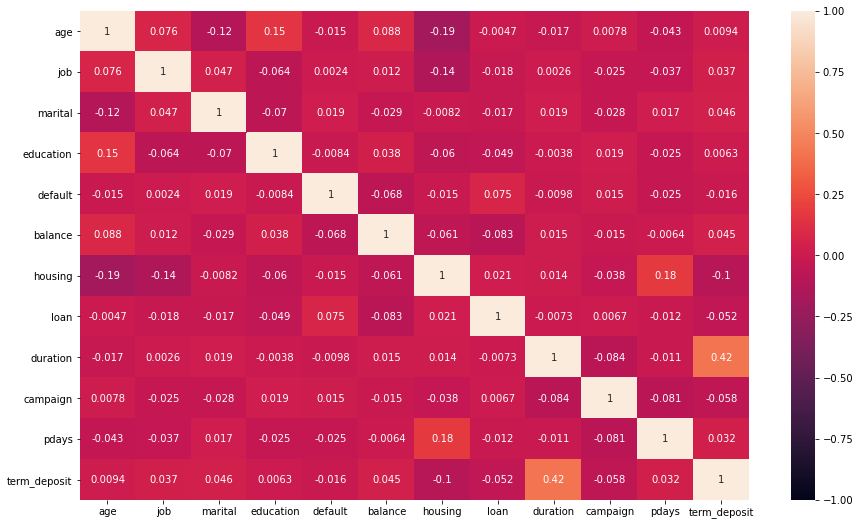

In [47]:
plt.figure(figsize=(15,9))
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1)
#değişkenlerin birbirleriyle olan ilişkisi

In [48]:
df["age"].unique()
#18 yaşından küçük var mı?

array([58, 44, 33, 35, 28, 42, 43, 41, 29, 53, 57, 51, 60, 56, 32, 25, 40,
       39, 52, 46, 36, 49, 59, 37, 50, 54, 55, 48, 24, 38, 31, 45, 47, 30,
       27, 34, 23, 26, 61, 22, 21, 20, 66, 62, 83, 75, 67, 70, 65, 68, 64,
       69, 72, 71, 76, 85, 63, 90, 82, 73, 74, 78, 80, 94, 79, 19, 77, 86,
       95, 81, 18, 89, 84, 87], dtype=int64)

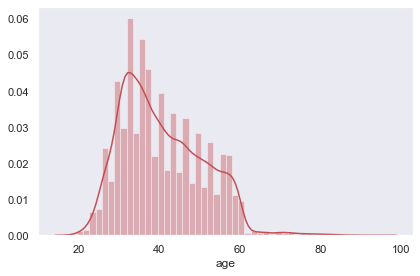

In [49]:
sns.set(style="dark")
sns.distplot(df["age"],bins=50,color="r")
plt.tight_layout()

In [50]:
df["job"].unique()

array([ 1,  2,  7,  5,  3,  4,  0,  6,  8,  9, 10], dtype=int64)

In [51]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,term_deposit
42634,21,10,1,0,0,0.095392,0,0,0.134404,2,92,1
42635,87,5,0,2,0,0.092686,0,0,0.104107,2,-1,1
42636,34,0,0,2,0,0.133795,0,0,0.056527,4,97,0
42637,22,10,1,0,0,0.075109,0,0,0.029077,2,-1,1
42638,32,1,1,1,0,0.090616,0,0,0.026434,1,-1,0


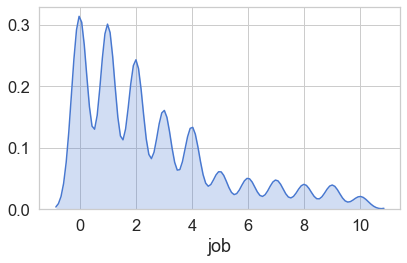

In [52]:
sns.set(style="whitegrid",palette="muted",font_scale=1.5)
sns.distplot(df["job"],bins=50,color="b",hist=False,kde_kws={"shade":True})
plt.tight_layout()

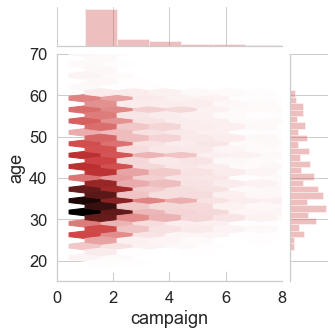

In [53]:
sns.jointplot(df["campaign"],df["age"],data=df,kind="hex",xlim=(0,8),ylim=(15,70),color="r",size=5)
#kampanya yaş arasındaki ilşki

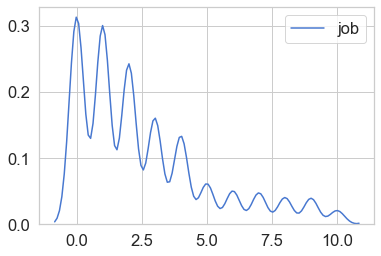

In [54]:
sns.kdeplot(df["job"])

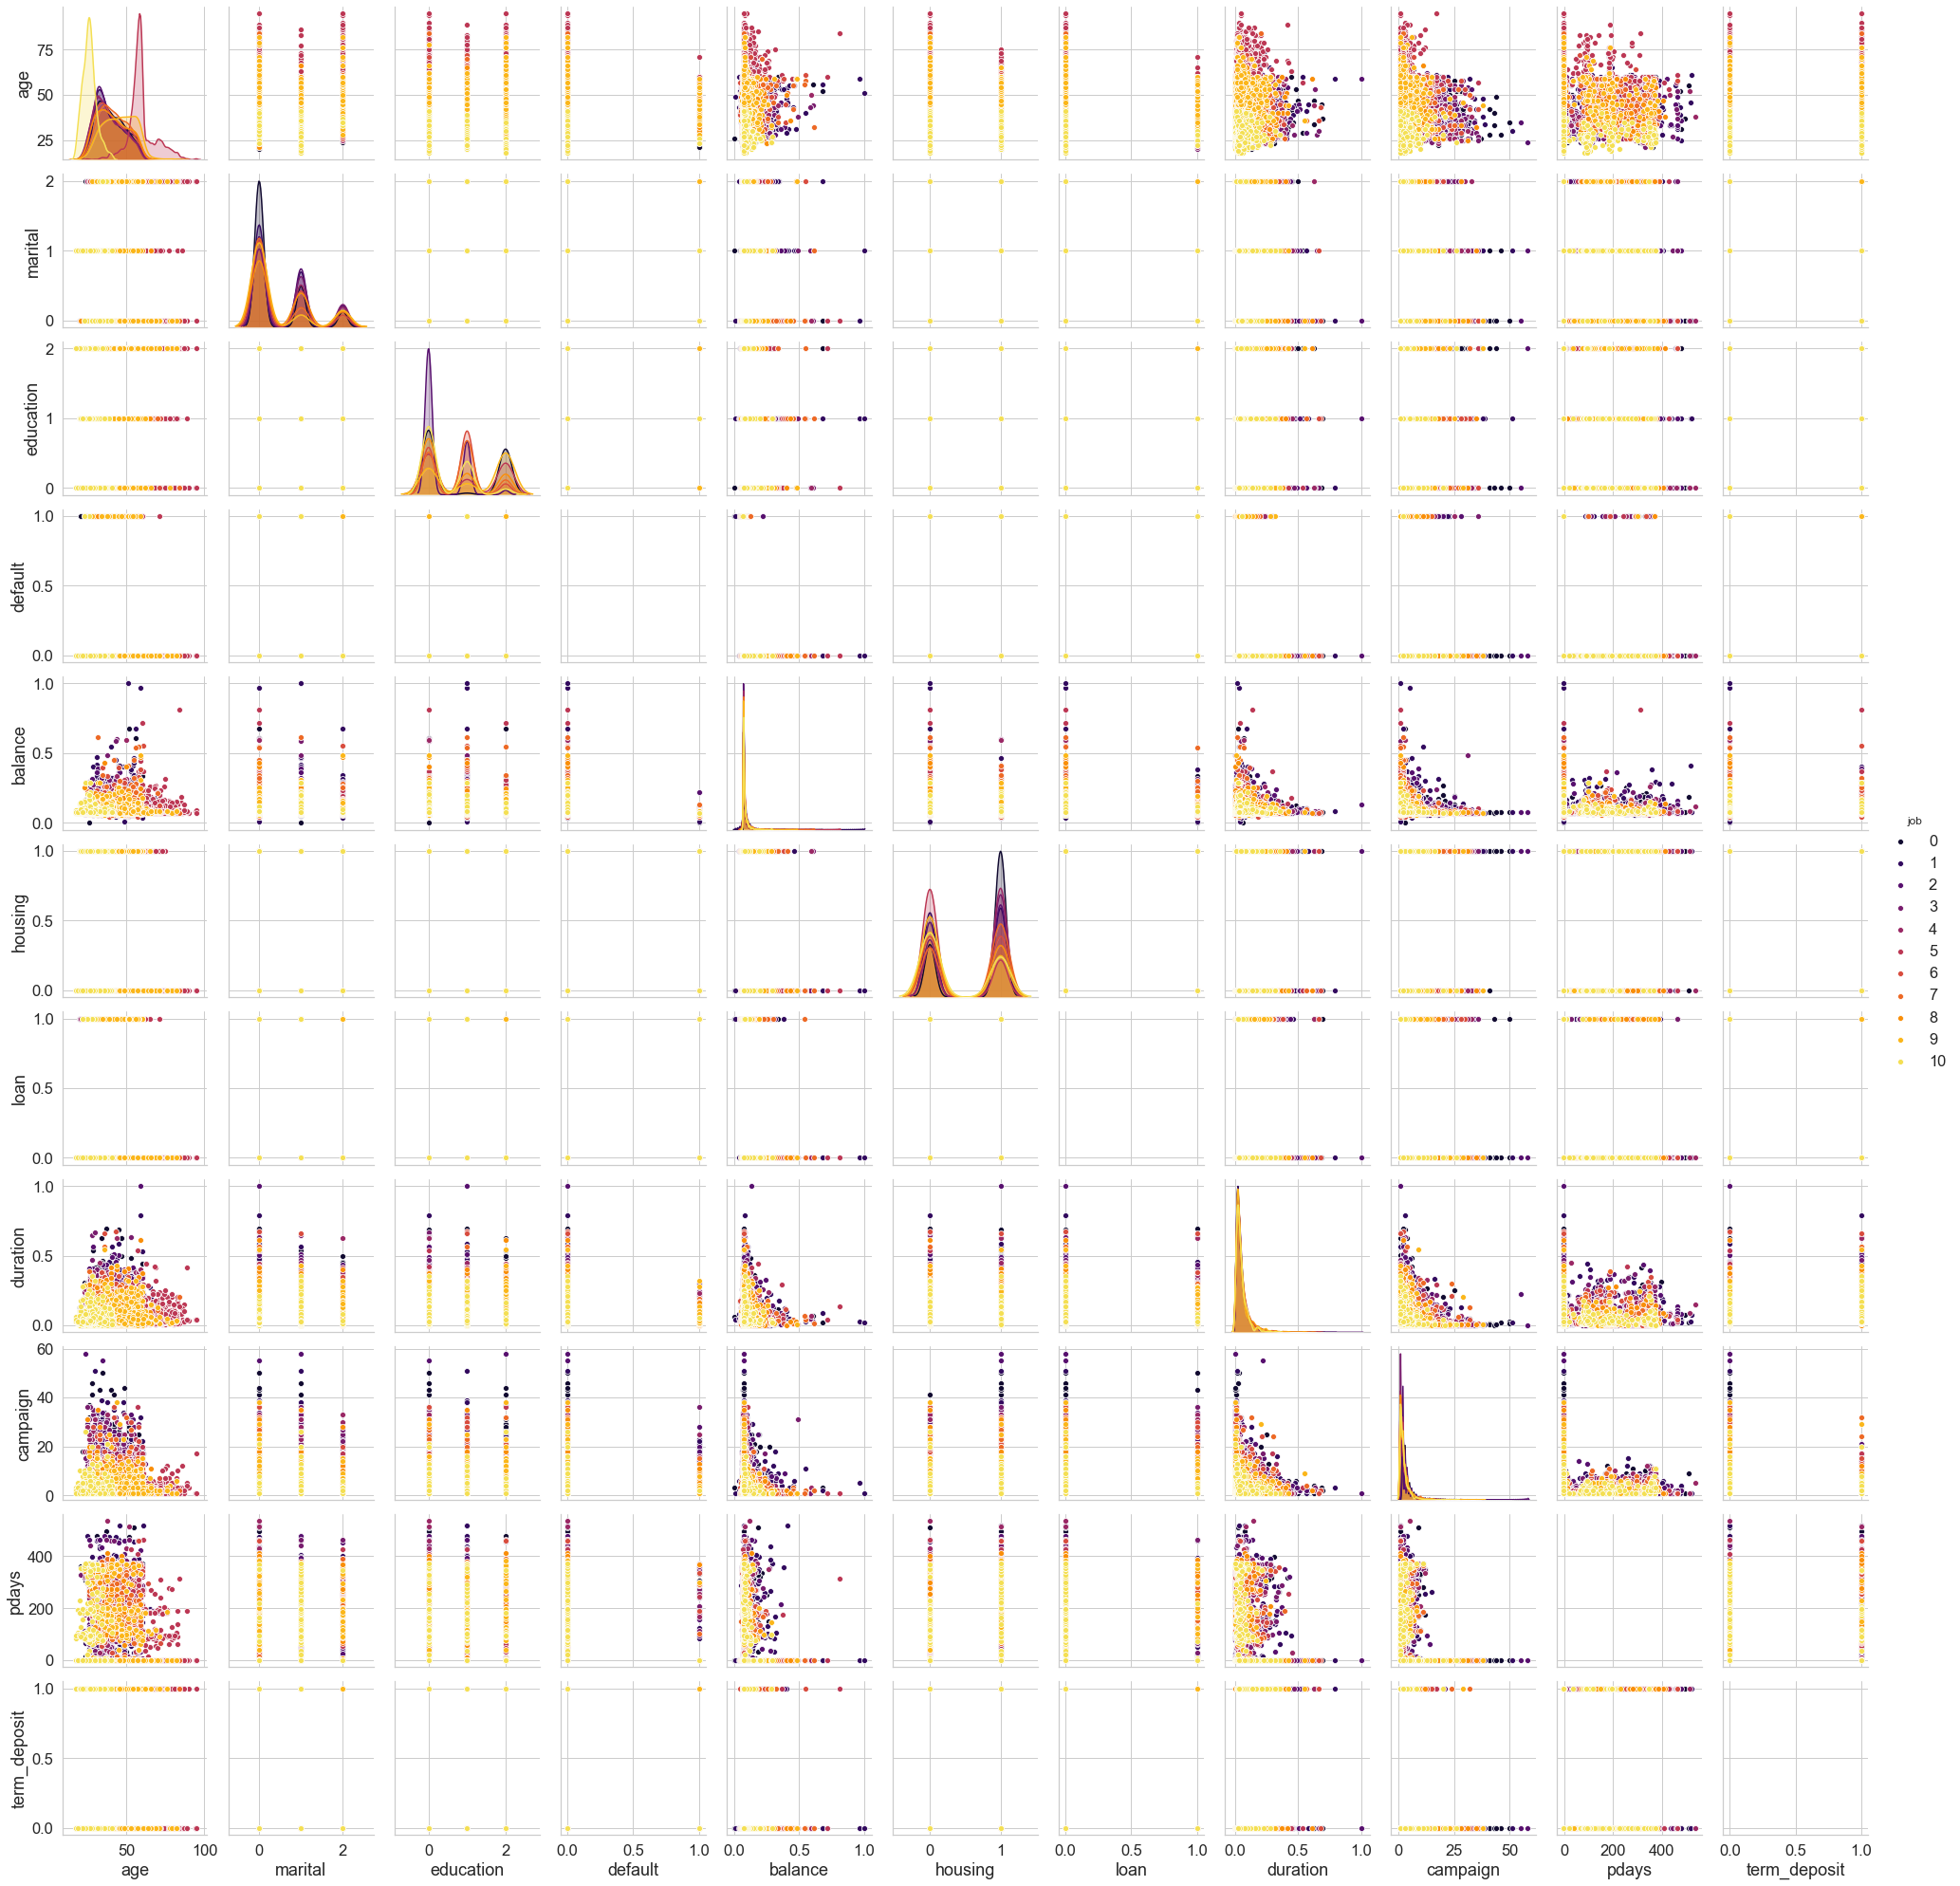

In [55]:

sns.pairplot(df,hue="job",palette="inferno")
#işin diğer özelliklerle olan ilişkisi

In [56]:
df.corr().nlargest(5,'term_deposit')


,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,term_deposit
term_deposit,0.009393,0.037353,0.045537,0.006330,-0.015599,0.044733,-0.100272,-0.051579,0.419340,-0.057778,0.031952,1.000000
duration,-0.016713,0.002600,0.019434,-0.003820,-0.009792,0.015081,0.014016,-0.007317,1.000000,-0.084261,-0.010970,0.419340
marital,-0.115157,0.046680,1.000000,-0.069738,0.018597,-0.028516,-0.008247,-0.017352,0.019434,-0.028349,0.016957,0.045537
balance,0.088034,0.012480,-0.028516,0.037924,-0.067795,1.000000,-0.060737,-0.082624,0.015081,-0.015010,-0.006369,0.044733
job,0.075664,1.000000,0.046680,-0.063956,0.002448,0.012480,-0.138941,-0.018103,0.002600,-0.025378,-0.037246,0.037353


In [57]:
df.corr().nlargest(5,'term_deposit').index

Index(['term_deposit', 'duration', 'marital', 'balance', 'job'], dtype='object')

In [58]:
feature_names=df.corr().nlargest(5,'term_deposit').index.tolist()

In [59]:
feature_names

['term_deposit', 'duration', 'marital', 'balance', 'job']

In [60]:
#Test-Eğitim Seti Oluşturma
X=df[[ 'duration', 'marital', 'balance', 'job']]
y=df.iloc[:,11] 

In [61]:
X

,duration,marital,balance,job
0,0.053070,0,0.092259,1
1,0.030704,1,0.073067,2
2,0.015453,0,0.072822,7
5,0.028264,0,0.074901,1
6,0.044124,1,0.076862,1
...,...,...,...,...
42634,0.134404,1,0.095392,10
42635,0.104107,0,0.092686,5
42636,0.056527,0,0.133795,0
42637,0.029077,1,0.075109,10


In [62]:
y

0        0
1        0
2        0
5        0
6        0
        ..
42634    1
42635    1
42636    0
42637    1
42638    0
Name: term_deposit, Length: 40802, dtype: int64

In [63]:
#Dengesiz Dağılmış Veri ile Mücadele
def upSample(X, y):
    df_all = pd.concat((X, pd.DataFrame({'value': y}, index=y.index)), axis=1)
    
    df_majority = df_all [df_all.value==0]
    df_minority = df_all[df_all.value==1]
     
    # Upsample minority class
    df_minority_upsampled = resample(df_minority, 
                                     replace=True,     # sample with replacement
                                     n_samples=df_majority.shape[0],    # to match majority class
                                     random_state=123) # reproducible results
    # Combine majority class with upsampled minority class
    df_upsampled = pd.concat([df_majority, df_minority_upsampled], axis=0)
    y_upsampled = df_upsampled.value
    X_upsampled = df_upsampled.drop('value', axis=1)

    return X_upsampled, y_upsampled



In [64]:
X,y=upSample(X, y)

In [65]:
y.value_counts()

1    37012
0    37012
Name: value, dtype: int64

## modelleme

####  GradientBoostingClassifier

In [66]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix

In [67]:
gbm_model=GradientBoostingClassifier()

In [68]:
gbm_model_score=cross_val_score(gbm_model,X,y,cv=10,scoring='accuracy').mean()


In [69]:
gbm_model_score

0.7784771452659293

In [70]:
gbm_model.fit(X,y)

GradientBoostingClassifier()

In [71]:
prediction=gbm_model.predict(X)

In [72]:
confusion_matrix(y, prediction)

array([[28824,  8188],
       [ 7966, 29046]], dtype=int64)

In [73]:
print("GradientBoostingClassifier","\n")
print(classification_report(y,prediction))


GradientBoostingClassifier 

              precision    recall  f1-score   support

           0       0.78      0.78      0.78     37012
           1       0.78      0.78      0.78     37012

    accuracy                           0.78     74024
   macro avg       0.78      0.78      0.78     74024
weighted avg       0.78      0.78      0.78     74024



In [74]:
results=[]

In [75]:
results.append(gbm_model_score)


##### LogisticRegression

In [76]:
log_reg=linear_model.LogisticRegression()

In [77]:
log_reg_score=cross_val_score(log_reg,X,y,cv=10,scoring='accuracy').mean()

In [78]:
log_reg_score

0.7471499866251816

In [79]:
log_reg.fit(X,y)

LogisticRegression()

In [80]:
prediction=log_reg.predict(X)

In [81]:
confusion_matrix(y, prediction)

array([[30838,  6174],
       [12432, 24580]], dtype=int64)

In [82]:
print("LogisticRegression","\n")

print(classification_report(y,prediction))


LogisticRegression 

              precision    recall  f1-score   support

           0       0.71      0.83      0.77     37012
           1       0.80      0.66      0.73     37012

    accuracy                           0.75     74024
   macro avg       0.76      0.75      0.75     74024
weighted avg       0.76      0.75      0.75     74024



In [83]:
results.append(log_reg_score)

#### DecisionTreeClassifier

In [84]:
decision = DecisionTreeClassifier(max_depth=15)
decision_score=cross_val_score(decision,X,y,cv=10,scoring='accuracy').mean()

In [85]:
decision_score

0.8581674243297159

In [86]:
decision.fit(X,y)

DecisionTreeClassifier(max_depth=15)

In [87]:
prediction=decision.predict(X)

In [88]:
confusion_matrix(y, prediction)

array([[30555,  6457],
       [ 2573, 34439]], dtype=int64)

In [89]:
print("DecisionTreeClassifier","\n")

print(classification_report(y,prediction))


DecisionTreeClassifier 

              precision    recall  f1-score   support

           0       0.92      0.83      0.87     37012
           1       0.84      0.93      0.88     37012

    accuracy                           0.88     74024
   macro avg       0.88      0.88      0.88     74024
weighted avg       0.88      0.88      0.88     74024



In [90]:
results.append(decision_score)

#### RandomForestClassifier

In [91]:
forest = RandomForestClassifier(max_depth=15)
forest_score=cross_val_score(forest, X, y, cv=10, scoring="accuracy").mean()

In [92]:
forest_score

0.9193369031877399

In [93]:
forest.fit(X,y)

RandomForestClassifier(max_depth=15)

In [94]:
prediction=forest.predict(X)

In [95]:
confusion_matrix(y, prediction)

array([[33783,  3229],
       [  877, 36135]], dtype=int64)

In [96]:
print("RandomForestClassifier","\n")

print(classification_report(y,prediction))


RandomForestClassifier 

              precision    recall  f1-score   support

           0       0.97      0.91      0.94     37012
           1       0.92      0.98      0.95     37012

    accuracy                           0.94     74024
   macro avg       0.95      0.94      0.94     74024
weighted avg       0.95      0.94      0.94     74024



In [97]:
results.append(forest_score)

#### XGBClassifier

In [98]:
xgb = XGBClassifier()
xgb_score=cross_val_score(xgb, X, y, cv=10, scoring="accuracy").mean()

[01:40:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:40:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:40:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:40:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [99]:
xgb_score

0.8541688098798682

In [100]:
xgb.fit(X,y)

[01:41:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [101]:
prediction=xgb.predict(X)

In [102]:
confusion_matrix(y, prediction)

array([[31312,  5700],
       [ 3624, 33388]], dtype=int64)

In [103]:
print("XGBClassifier","\n")

print(classification_report(y,prediction))


XGBClassifier 

              precision    recall  f1-score   support

           0       0.90      0.85      0.87     37012
           1       0.85      0.90      0.88     37012

    accuracy                           0.87     74024
   macro avg       0.88      0.87      0.87     74024
weighted avg       0.88      0.87      0.87     74024



In [104]:
results.append(xgb_score)

In [105]:
from sklearn import svm

#### SVC

In [106]:
linear_svm=svm.SVC(kernel='linear',)

In [107]:
linear_svm_score=cross_val_score(linear_svm,X,y,cv=10,scoring='accuracy').mean()

In [108]:
linear_svm_score

0.7441644512475737

In [109]:
linear_svm.fit(X,y)

SVC(kernel='linear')

In [110]:
prediction=linear_svm.predict(X)

In [111]:
confusion_matrix(y, prediction)

array([[31333,  5679],
       [13179, 23833]], dtype=int64)

In [112]:
print("SVC","\n")

print(classification_report(y,prediction))

SVC 

              precision    recall  f1-score   support

           0       0.70      0.85      0.77     37012
           1       0.81      0.64      0.72     37012

    accuracy                           0.75     74024
   macro avg       0.76      0.75      0.74     74024
weighted avg       0.76      0.75      0.74     74024



In [113]:
results.append(linear_svm_score)

In [114]:
results

[0.7784771452659293,
 0.7471499866251816,
 0.8581674243297159,
 0.9193369031877399,
 0.8541688098798682,
 0.7441644512475737]

In [115]:
import pickle #modelimizi kaydediyor

In [116]:
filename='bank.sav' 

In [117]:
forest.fit(X,y)

pickle.dump(forest,open(filename,'wb')) #kaydet

In [118]:
loded_model=pickle.load(open(filename,'rb'))

In [119]:
loded_model

RandomForestClassifier(max_depth=15)